In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
dados = pd.DataFrame(pd.read_csv('/content/sample_data/vgsales.csv'))

dados.rename(columns = {'Name':'Nome','Platform':'Plataforma','Year':'Ano','Genre':'Genero','Publisher':'Desenvolvedora',
                       'Global_Sales':'Total','Other_Sales':'Outras_Vendas'}, inplace = True)
dados.head(3)


,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [138]:
dados = dados[(dados.Ano >= 2006.0) & (dados.Ano <= 2006.0)]

In [139]:
dados['Percentual_EU'] = (dados['EU_Sales'] / dados['Total']).round(2)
dados

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total,Percentual_EU
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.35
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,0.31
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,0.32
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,0.25
100,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...
16513,16516,Deal or No Deal,PC,2006.0,Misc,Focus Home Interactive,0.00,0.01,0.00,0.00,0.01,1.00
16520,16523,Tengai Makyo: Dai Yon no Mokushiroku,PSP,2006.0,Role-Playing,Hudson Soft,0.00,0.00,0.01,0.00,0.01,0.00
16523,16526,Style Book: Cinnamoroll,DS,2006.0,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01,0.00
16547,16550,Bookworm Deluxe,PC,2006.0,Puzzle,PopCap Games,0.01,0.00,0.00,0.00,0.01,0.00


In [140]:
dados.dtypes

Rank                int64
Nome               object
Plataforma         object
Ano               float64
Genero             object
Desenvolvedora     object
NA_Sales          float64
EU_Sales          float64
JP_Sales          float64
Outras_Vendas     float64
Total             float64
Percentual_EU     float64
dtype: object

In [141]:
Desenvolvedoras = pd.DataFrame(dados.Desenvolvedora.value_counts())
Desenvolvedoras.sort_values(by = 'Desenvolvedora', ascending = False, inplace = True)
Desenvolvedoras.reset_index(inplace = True)
Desenvolvedoras.rename(columns = {'index':'Desenvolvedora','Desenvolvedora':'Qtd'}, inplace = True)
Desenvolvedoras['Qtd'] = np.array(Desenvolvedoras['Qtd']).astype(int)
Desenvolvedoras = Desenvolvedoras.head(10)

Text(0.5, 1.0, 'Maiores Quantidades de desenvolvedoras de jogos em 2006')

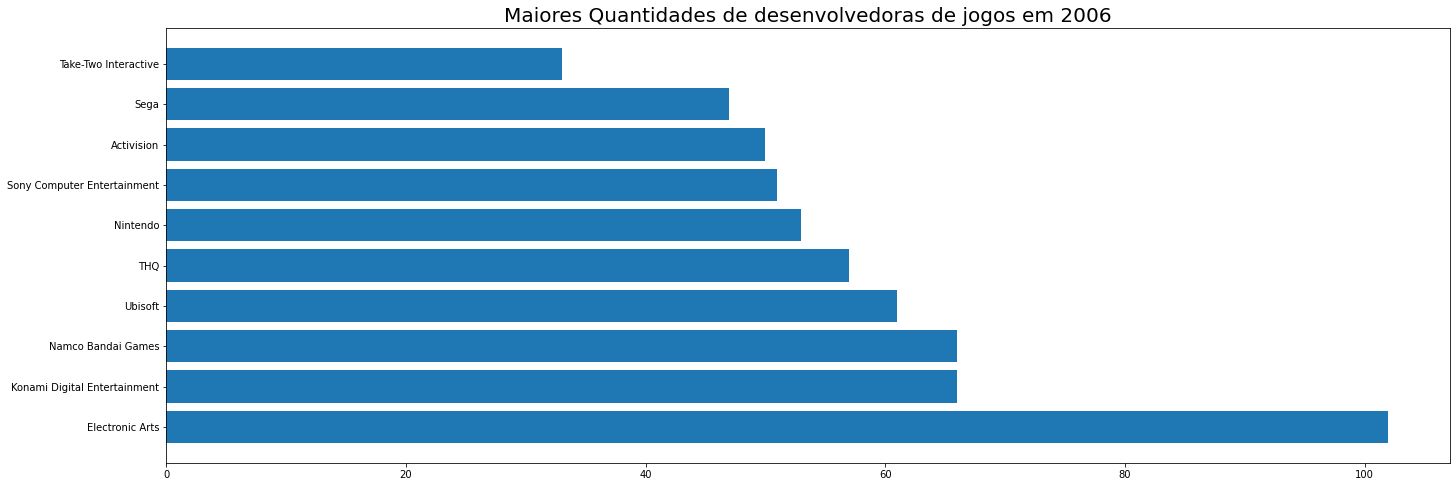

In [142]:
plt.figure(figsize = (23,8))
plt.barh(Desenvolvedoras.Desenvolvedora,Desenvolvedoras.Qtd)
plt.title('Maiores Quantidades de desenvolvedoras de jogos em 2006', fontsize = 20)

In [143]:
dados.groupby('Genero')['Total'].max() #Agrupando por genero e maior quantidade

Genero
Action           7.31
Adventure        1.48
Fighting         2.63
Misc            29.02
Platform        30.01
Puzzle           2.92
Racing           3.88
Role-Playing    18.36
Shooter          6.11
Simulation       5.72
Sports          82.74
Strategy         0.78
Name: Total, dtype: float64

In [144]:
dados = pd.DataFrame(pd.read_csv('/content/sample_data/vgsales.csv'))

dados.rename(columns = {'Name':'Nome','Platform':'Plataforma','Year':'Ano','Genre':'Genero','Publisher':'Desenvolvedora',
                       'Global_Sales':'Total','Other_Sales':'Outras_Vendas'}, inplace = True)
dados.head(3)


,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [145]:
# dados.groupby(['Ano'], sort=False)['Total'].max()

In [146]:
idx = dados.groupby(['Ano'])['Total'].transform(max) == dados['Total']
idx = dados[idx].sort_values(by ='Ano', ascending = False)
idx.head(10)
#Primeiros 10 jogos mais vendidos por ano

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00


In [147]:
idx = pd.DataFrame(idx)
idx.reset_index(inplace = True)
idx.drop(columns=['index','Rank'],inplace = True)
#idx.reset_index(inplace = True)
#idx.drop(columns=['index'],inplace = True)

#Resetar indices e remover colunas

In [150]:
idx.head(2)

,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total
0,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03


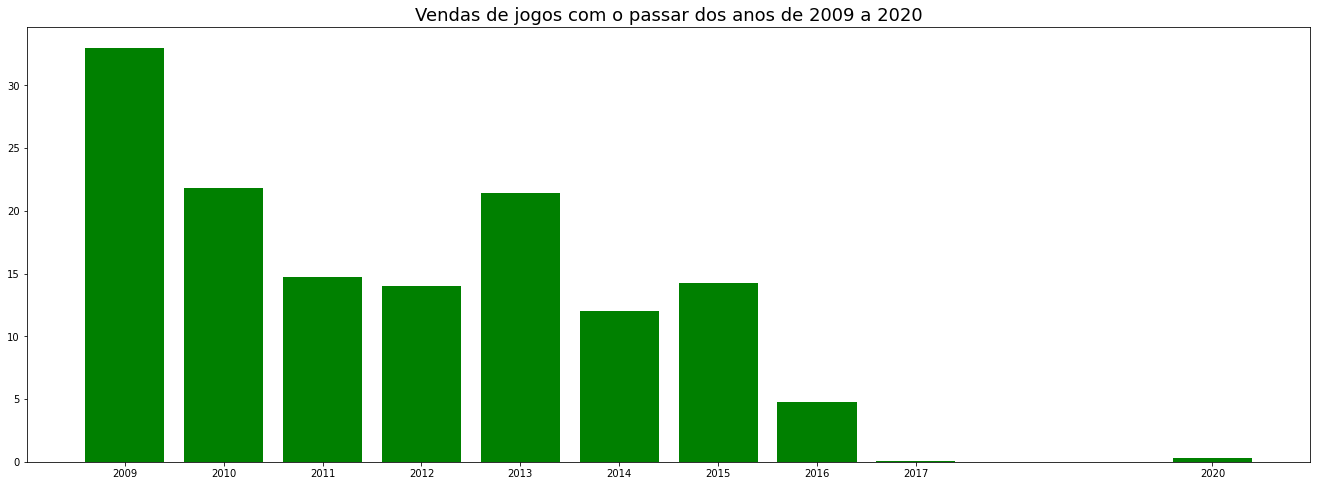

In [168]:
idx = idx.head(10)
plt.figure(figsize = (23,8))
plt.bar(idx['Ano'],idx['Total'],color='g')
plt.xticks(ticks=idx['Ano'])
plt.title('Vendas de jogos com o passar dos anos de 2009 a 2020', fontsize = 18)
plt.show()

In [201]:
idx = dados.groupby(['Ano'])['Total'].transform(max) == dados['Total']
idx = dados[idx].sort_values(by ='Ano', ascending = False)
idx.head(3)
# func = transform//self-produced dataframe with transformed values after applying the function specified in its parameter

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
